# Predicting Employee Exit

In [1]:
# necessary libraries to import
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import category_encoders
from category_encoders import BinaryEncoder
import matplotlib.pyplot as plt
from matplotlib import rc_context, rcParams
import seaborn as sns

In [2]:
# importing the data
df = pd.read_csv('/Users/sahreenhaider/Desktop/downloads-github/Data/HR_comma_sep.csv.txt', sep=',')

In [3]:
# first five rows of the data
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Data Preprocessing

In [4]:
# looking for missing values
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [5]:
print(df['left'].unique())

[1 0]


In [6]:
df.sales.unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [7]:
df.salary.unique()

array(['low', 'medium', 'high'], dtype=object)

In [8]:
le = LabelEncoder()

In [9]:
df['salary'] = le.fit_transform(df['salary'])

In [10]:
df = BinaryEncoder(cols=['sales']).fit(df).transform(df)

In [11]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales_0', 'sales_1', 'sales_2', 'sales_3',
       'salary'],
      dtype='object')

In [12]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales_0,sales_1,sales_2,sales_3,salary
0,0.38,0.53,2,157,3,0,1,0,0,0,0,1,1
1,0.80,0.86,5,262,6,0,1,0,0,0,0,1,2
2,0.11,0.88,7,272,4,0,1,0,0,0,0,1,2
3,0.72,0.87,5,223,5,0,1,0,0,0,0,1,1
4,0.37,0.52,2,159,3,0,1,0,0,0,0,1,1


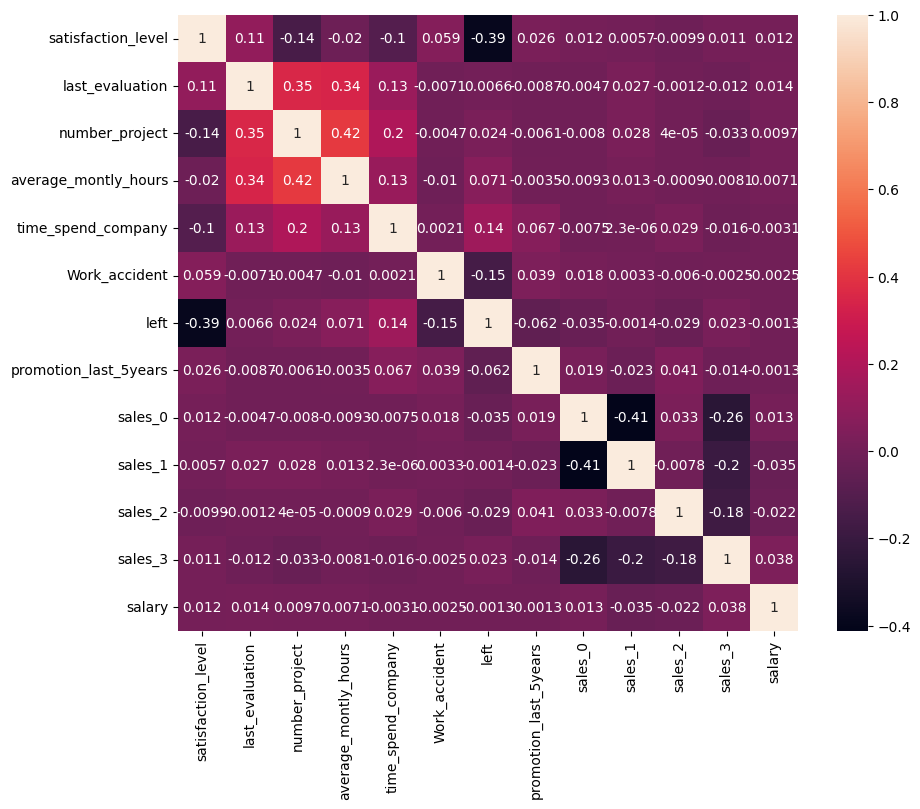

In [14]:
with rc_context({'figure.facecolor':'white'}):
    plt.figure(figsize=(10,8))
    sns.heatmap(df.corr(), annot=True);

In [15]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales_0', 'sales_1', 'sales_2', 'sales_3',
       'salary'],
      dtype='object')

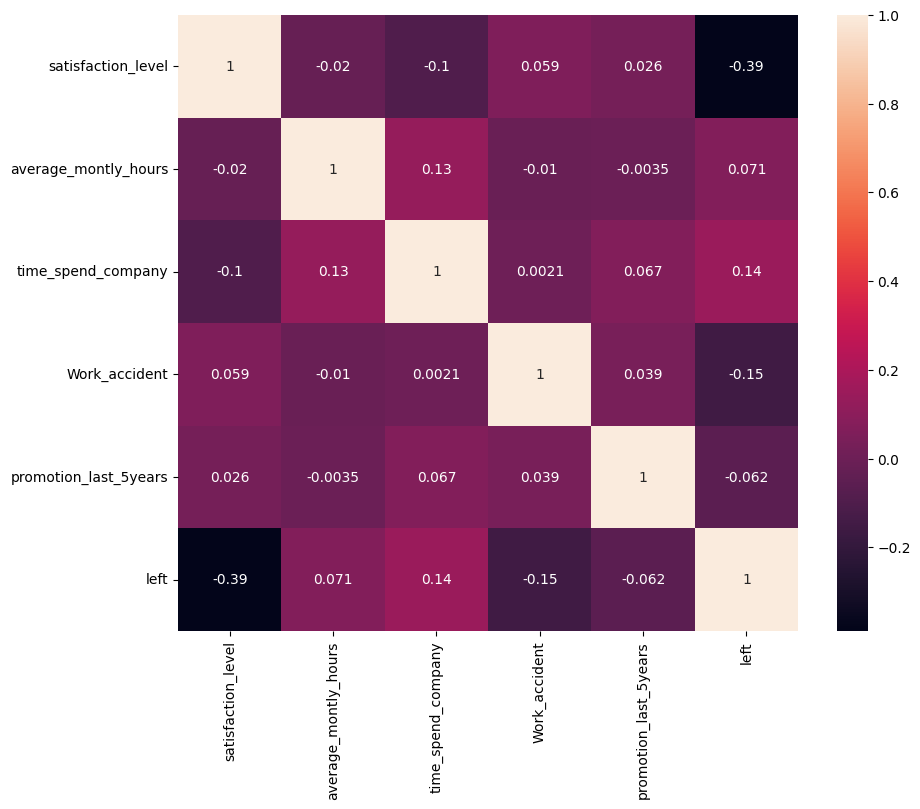

In [16]:
with rc_context({'figure.facecolor':'white'}):
    plt.figure(figsize=(10,8))
    sns.heatmap(df[['satisfaction_level', 'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years','left']].corr(), annot=True);

In [17]:
X = df[['satisfaction_level', 'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years']]
y = df['left']

In [18]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [19]:
X = pd.DataFrame(X, columns=[['satisfaction_level','average_montly_hours','time_spend_company','Work_accident','promotion_last_5years']])

In [20]:
X.head()

,satisfaction_level,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
0,-0.936495,-0.882040,-0.341235,-0.411165,-0.147412
1,0.752814,1.220423,1.713436,-0.411165,-0.147412
2,-2.022479,1.420657,0.343655,-0.411165,-0.147412
3,0.431041,0.439508,1.028546,-0.411165,-0.147412
4,-0.976716,-0.841993,-0.341235,-0.411165,-0.147412


In [21]:
print(X.shape)
print(y.shape)


(14999, 5)
(14999,)


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [23]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [24]:
y_pred = model.predict(X_test)

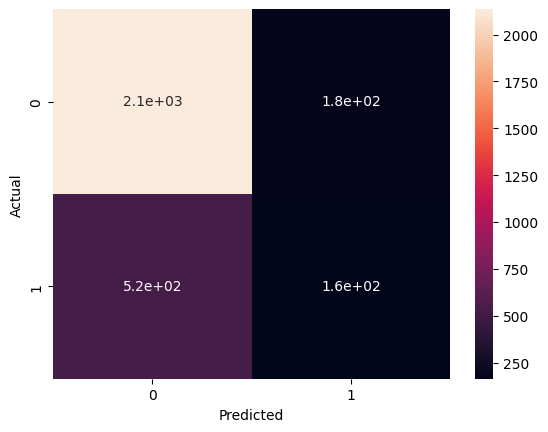

In [25]:
# confusion matrix
cm = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(cm, annot=True);

In [26]:
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.7666666666666667
